In [3]:
#importing required libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
#importing dataset
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train),len(X_test)

(60000, 10000)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[4].shape

(28, 28)

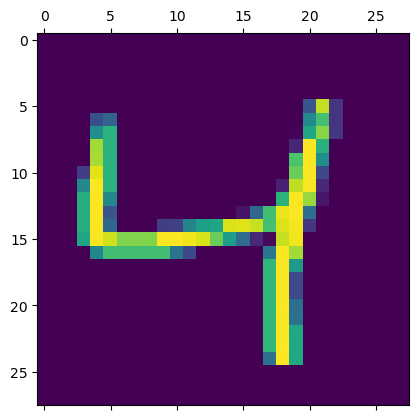

In [8]:
plt.matshow(X_train[2])

In [9]:
Y_train[2]

4

In [10]:
X_train.shape  #60000 different images,each image is 28*28

(60000, 28, 28)

In [11]:
#scaling (max value of a pixel is 255)
X_train=X_train/255
X_test=X_test/255

In [18]:
X_test.shape

(10000, 28, 28)

In [19]:
#now we flatten our image
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [20]:
X_train_flattened.shape

(60000, 784)

In [21]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
Y_train.shape
Y_train[:4]

array([5, 0, 4, 1], dtype=uint8)

In [31]:
#Building the model 

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


In [32]:
#compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
#fitting the model
model.fit(X_train_flattened,Y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 516us/step - loss: 0.2752 - accuracy: 0.9225
Epoch 2/20
1875/1875 [==============================] - 1s 504us/step - loss: 0.1247 - accuracy: 0.9634
Epoch 3/20
1875/1875 [==============================] - 1s 508us/step - loss: 0.0884 - accuracy: 0.9729
Epoch 4/20
1875/1875 [==============================] - 1s 509us/step - loss: 0.0673 - accuracy: 0.9794
Epoch 5/20
1875/1875 [==============================] - 1s 510us/step - loss: 0.0535 - accuracy: 0.9835
Epoch 6/20
1875/1875 [==============================] - 1s 698us/step - loss: 0.0424 - accuracy: 0.9864
Epoch 7/20
1875/1875 [==============================] - 1s 534us/step - loss: 0.0355 - accuracy: 0.9889
Epoch 8/20
1875/1875 [==============================] - 1s 521us/step - loss: 0.0282 - accuracy: 0.9912
Epoch 9/20
1875/1875 [==============================] - 1s 537us/step - loss: 0.0245 - accuracy: 0.9923
Epoch 10/20
1875/1875 [==============================] - 1s 521u

In [34]:
model.evaluate(X_test_flattened,Y_test,batch_size=12)

834/834 [==============================] - 0s 308us/step - loss: 0.0997 - accuracy: 0.9792


[0.09967421740293503, 0.979200005531311]

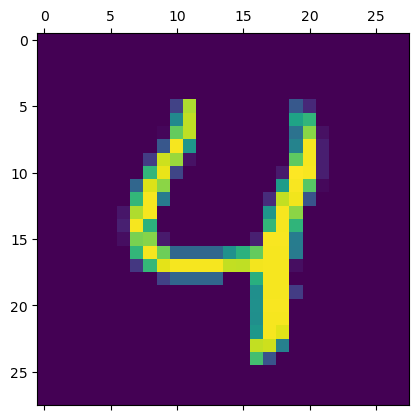

In [35]:
#checking our predictions
plt.matshow(X_test[4])

In [36]:
y_preds=model.predict(X_test_flattened)

313/313 [==============================] - 0s 305us/step


In [37]:
 y_preds.shape

(10000, 10)

In [38]:
y_preds[4] #gives the probabilty of all the classes

array([2.7447811e-09, 1.4215589e-16, 2.4231539e-12, 5.9991977e-18,
       9.9916244e-01, 1.1825950e-14, 3.9960597e-11, 3.6851418e-08,
       1.8185528e-11, 8.3758228e-04], dtype=float32)

In [39]:
np.argmax(y_preds[4])

4

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_preds]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [41]:
#confusion matrix for our predictions
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    1,    1,    0,    2,    1,    2,    1],
       [   0, 1124,    5,    1,    0,    0,    2,    1,    2,    0],
       [   6,    0, 1010,    1,    1,    1,    5,    4,    4,    0],
       [   0,    1,    5,  987,    0,    4,    0,    4,    5,    4],
       [   2,    0,    4,    1,  960,    1,    3,    1,    0,   10],
       [   2,    1,    0,    6,    0,  874,    2,    0,    6,    1],
       [   4,    2,    0,    1,    3,    4,  942,    0,    1,    1],
       [   2,    3,   10,    1,    2,    0,    1,  998,    4,    7],
       [   6,    0,    5,    3,    6,    4,    1,    4,  941,    4],
       [   1,    4,    0,    2,    6,    3,    0,    4,    3,  986]],
      dtype=int32)>

Text(45.722222222222214, 0.5, 'True value')

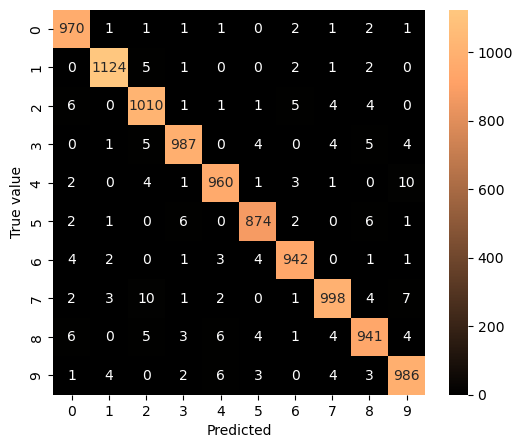

In [71]:
#visualising
import seaborn as sn
plt.figure(figsize = (6,5))
sn. heatmap (cm, annot=True, fmt='d',cmap='copper')
plt.xlabel('Predicted')
plt.ylabel("True value")

### Checking our prediction

DIGIT is: 3


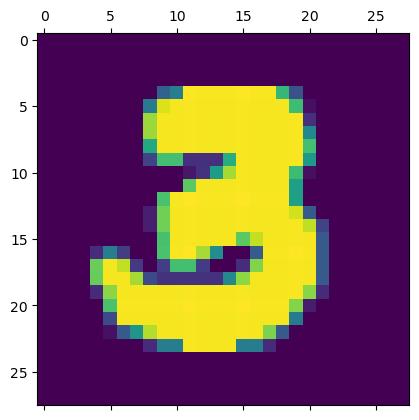

In [56]:
plt.matshow(X_test[200])
print('DIGIT is:',Y_test[200]) 


In [57]:
print("Model's prediction:", y_predicted_labels[200])

Model's prediction: 3
